In [4359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring the Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries from sklearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [4360]:
data = pd.read_csv('train.csv',na_values=['?','-999','Error'])
data_test = pd.read_csv('test.csv',na_values=['?','-999','Error'])
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4361]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

In [4362]:
data.shape

(36992, 25)

In [4363]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,34993.000000,36992.000000,36992.000000,33470.000000,33549.000000,36992.000000
mean,37.118161,12.758552,243.472334,29271.194003,15.976715,686.882199,3.463397
std,15.867412,5.572600,398.289149,19444.806226,9.215858,194.063624,1.409661
min,10.000000,1.000000,-2814.109110,800.460000,-43.652702,-760.661236,-1.000000
25%,23.000000,9.000000,60.102500,14177.540000,9.000000,616.150000,3.000000
50%,37.000000,13.000000,161.765000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,17.000000,356.515000,40855.110000,23.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


In [4364]:
data.head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4365]:
len(data)

36992

In [4366]:
data=data.drop_duplicates()
data_test=data_test.drop_duplicates()

In [4367]:
len(data)

36992

In [4368]:
data['referral_id'].unique()

array(['xxxxxxxx', 'CID21329', 'CID12313', ..., 'CID60808', 'CID10431',
       'CID45477'], dtype=object)

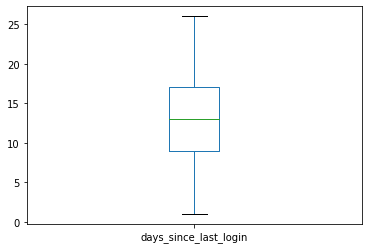

In [4369]:
data['days_since_last_login'].plot(kind='box')

In [4370]:
data_test_customer = data_test['customer_id']

In [4371]:
data.drop(['customer_id','Name','security_no', 'last_visit_time'], axis=1, inplace=True)
data_test.drop(['customer_id','Name','security_no',  'last_visit_time'], axis=1, inplace=True)

In [4372]:
# plt.figure(figsize=(20,12))
# sns.pairplot(data)
# plt.show()

In [4373]:
# plt.figure(figsize = (16, 10))
# cor=data.corr()
# sns.heatmap(cor, annot = True, cmap="YlGnBu")
# plt.show()

In [4374]:
data[data.columns[1:]].corr()['churn_risk_score'][:].round(2).sort_values(ascending=True)

avg_transaction_value      -0.29
points_in_wallet           -0.26
avg_time_spent             -0.02
days_since_last_login       0.02
avg_frequency_login_days    0.16
churn_risk_score            1.00
Name: churn_risk_score, dtype: float64

In [4375]:
# data.drop(['days_since_last_login','avg_time_spent'], axis=1, inplace=True)
# data_test.drop(['days_since_last_login','avg_time_spent'], axis=1, inplace=True)

In [4376]:
(100*data.isnull().sum()/len(data)).reset_index().sort_values(by=0,ascending=False)

,index,0
5,joined_through_referral,14.700476
2,region_category,14.673443
8,medium_of_operation,14.578828
13,avg_frequency_login_days,9.520978
14,points_in_wallet,9.307418
10,days_since_last_login,5.403871
7,preferred_offer_types,0.778547
19,feedback,0.000000
18,complaint_status,0.000000
17,past_complaint,0.000000


In [4377]:
data['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [4378]:
df = data[data.churn_risk_score == -1]
print(df.index)
data.drop(df.index, inplace=True)

Int64Index([   23,    50,    62,    63,    85,    99,   116,   145,   175,
              196,
            ...
            36714, 36722, 36778, 36794, 36812, 36835, 36849, 36859, 36863,
            36981],
           dtype='int64', length=1163)


In [4379]:
# from sklearn.utils import resample

# df_majority = data[data.churn_risk_score==3]

# df_remain1 = data[data.churn_risk_score==5]
# df_remain2 = data[data.churn_risk_score==4]

# df_minority1 = data[data.churn_risk_score==1]
# df_minority2 = data[data.churn_risk_score==2]

# df_minority1_upsampled = resample(df_minority1, replace=True, n_samples=10424, random_state=123)
# df_minority2_upsampled = resample(df_minority2, replace=True, n_samples=10424, random_state=123)

# data = pd.concat([df_remain1, df_remain2, df_majority, df_minority2_upsampled, df_minority1_upsampled])
 
# # Display new class counts
# data.churn_risk_score.value_counts()

In [4380]:
data.shape

(35829, 21)

In [4381]:
# def categorise(x):
#     if(1 <= x <= 3):
#         return "Low Risk"
#     else:
#         return "High Risk"
        
# data['symboling'] = car_data['symboling'].apply(lambda x: categorise(x))

In [4382]:
# plt.figure(figsize=(25,25))
# fig_num = 0
# def plot_categorical(var):       #Function to plot boxplots for all categorical variables
#     plt.subplot(3,4, fig_num)
#     sns.boxplot(x = var, y = 'churn_risk_score', data = data)

# categorical_vars = data.dtypes[data.dtypes==object].index
# for var in categorical_vars:
#     fig_num = fig_num + 1
#     plot_categorical(var)

# plt.show()

In [4383]:
data["days_since_last_login"]

0        17.0
1        16.0
2        14.0
3        11.0
4        20.0
         ... 
36987     2.0
36988    13.0
36989    12.0
36990    15.0
36991    15.0
Name: days_since_last_login, Length: 35829, dtype: float64

In [4384]:
(100*data.isnull().sum()/len(data)).reset_index().sort_values(by=0,ascending=False)

,index,0
5,joined_through_referral,14.770158
2,region_category,14.689218
8,medium_of_operation,14.597114
13,avg_frequency_login_days,9.542549
14,points_in_wallet,9.324849
10,days_since_last_login,5.425772
7,preferred_offer_types,0.770326
19,feedback,0.000000
18,complaint_status,0.000000
17,past_complaint,0.000000


In [4385]:
data['region_category'] = data['region_category'].fillna(data['region_category'].value_counts().index[0])
data['points_in_wallet'] = data['points_in_wallet'].fillna(data['points_in_wallet'].mean())
data['preferred_offer_types'] = data['preferred_offer_types'].fillna(data['preferred_offer_types'].value_counts().index[0])
data['joined_through_referral'] = data['joined_through_referral'].fillna(data['joined_through_referral'].value_counts().index[0])
data['medium_of_operation'] = data['medium_of_operation'].fillna(data['medium_of_operation'].value_counts().index[0])
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].fillna(data['avg_frequency_login_days'].mean())
data['days_since_last_login'] = data['days_since_last_login'].fillna(data['days_since_last_login'].mean())

data_test['region_category'] = data_test['region_category'].fillna(data_test['region_category'].value_counts().index[0])
data_test['points_in_wallet'] = data_test['points_in_wallet'].fillna(data_test['points_in_wallet'].mean())
data_test['preferred_offer_types'] = data_test['preferred_offer_types'].fillna(data_test['preferred_offer_types'].value_counts().index[0])
data_test['joined_through_referral'] = data_test['joined_through_referral'].fillna(data_test['joined_through_referral'].value_counts().index[0])
data_test['medium_of_operation'] = data_test['medium_of_operation'].fillna(data_test['medium_of_operation'].value_counts().index[0])
data_test['avg_frequency_login_days'] = data_test['avg_frequency_login_days'].fillna(data_test['avg_frequency_login_days'].mean())
data_test['days_since_last_login'] = data_test['days_since_last_login'].fillna(data_test['days_since_last_login'].mean())

for i in data.columns:
  if data[i].dtype=='float64':
    data[i]=data[i].fillna(data[i].mean())
  else:
    data[i]=data[i].fillna(method='ffill')
    
for i in data_test.columns:
  if data_test[i].dtype=='float64':
    data_test[i]=data_test[i].fillna(data_test[i].mean())
  else:
    data_test[i]=data_test[i].fillna(method='ffill')

In [4386]:
# data = data.drop(data[data['points_in_wallet'] < 0].index, inplace=True)
# data = data.drop(data[data['avg_frequency_login_days'] < 0].index, inplace=True)
# data = data.drop(data[data['avg_transaction_value'] < 0].index, inplace=True)
# data = data.drop(data[data['days_since_last_login'] < 0].index, inplace=True)

# data_test = data_test.drop(data_test[data_test['points_in_wallet'] < 0].index, inplace=True)
# data_test = data_test.drop(data_test[data_test['avg_frequency_login_days'] < 0].index, inplace=True)
# data_test = data_test.drop(data_test[data_test['avg_transaction_value'] < 0].index, inplace=True)
# data_test = data_test.drop(data_test[data_test['days_since_last_login'] < 0].index, inplace=True)




# l1 = np.where(data['points_in_wallet'] < 0)
# data.drop(l1[0],inplace=True)
# data.index = range(0,data.shape[0])

# l1 = np.where(data_test['points_in_wallet'] < 0)
# data_test.drop(l1[0],inplace=True)
# data_test.index = range(0,data_test.shape[0])

# data['points_in_wallet'] = abs(data['points_in_wallet'])
# data_test['points_in_wallet'] = abs(data_test['points_in_wallet'])

# l2 = np.where(data['avg_frequency_login_days'] < 0)
# data.drop(l2[0],inplace=True)
# data.index = range(0,data.shape[0])

# l2 = np.where(data_test['avg_frequency_login_days'] < 0)
# data_test.drop(l2[0],inplace=True)
# data_test.index = range(0,data_test.shape[0])

# df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(int)
# df['avg_frequency_login_days'] = abs(df['avg_frequency_login_days'])

# l3 = np.where(data['avg_transaction_value'] < 0)
# data.drop(l3[0],inplace=True)
# data.index = range(0,data.shape[0])

# l3 = np.where(data_test['avg_transaction_value'] < 0)
# data_test.drop(l3[0],inplace=True)
# data_test.index = range(0,data_test.shape[0])

# data['avg_transaction_value'] = abs(data['avg_transaction_value'])
# data_test['avg_transaction_value'] = abs(data_test['avg_transaction_value'])

# l4 = np.where(data_test['days_since_last_login'] < 0)
# data_test.drop(l4[0],inplace=True)
# data_test.index = range(0,data_test.shape[0])


# data['days_since_last_login'] = abs(data['days_since_last_login'])
# data_test['days_since_last_login'] = abs(data_test['days_since_last_login'])

In [4387]:
# setting missing values to most occurring values
# data['joined_through_referral'] = data['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
# data_test['joined_through_referral'] = data_test['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
# data['joined_through_referral'].unique()

In [4388]:
# setting missing values to most occurring values
# data['medium_of_operation'] = data['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
# data_test['medium_of_operation'] = data_test['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
# data['medium_of_operation'].unique()

In [4389]:
# setting target wrong value -1 to 1 assuming sign issue, 
# and setting 5 to 0 for training after prediction revert it back to 5
# most_frequent = data['churn_risk_score'].value_counts().index[0]
# data['churn_risk_score'] = data['churn_risk_score'].apply(lambda x:1 if x == -1 else x)
# data['churn_risk_score'].unique()

In [4390]:
# setting missing values to most occurring values
data['referral_id'] = data['referral_id'].apply(lambda x:0 if x == 'xxxxxxxx' else 1)
data_test['referral_id'] = data_test['referral_id'].apply(lambda x:0 if x == 'xxxxxxxx' else 1)
data['referral_id'].unique()

array([0, 1], dtype=int64)

In [4391]:
# setting missing values to most occurring values
# data['avg_frequency_login_days'] = data['avg_frequency_login_days'].apply(lambda x:0 if x == 'Error' else x)
# data_test['avg_frequency_login_days'] = data_test['avg_frequency_login_days'].apply(lambda x:0 if x == 'Error' else x)
# data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'])
# data_test['avg_frequency_login_days'] = pd.to_numeric(data_test['avg_frequency_login_days'])
# data['avg_frequency_login_days'] = abs(data['avg_frequency_login_days'])
# data_test['avg_frequency_login_days'] = abs(data_test['avg_frequency_login_days'])
# data['avg_frequency_login_days'].describe()

In [4392]:
(100*data.isnull().sum()/len(data)).reset_index().sort_values(by=0,ascending=False)

,index,0
0,age,0.0
11,avg_time_spent,0.0
19,feedback,0.0
18,complaint_status,0.0
17,past_complaint,0.0
16,offer_application_preference,0.0
15,used_special_discount,0.0
14,points_in_wallet,0.0
13,avg_frequency_login_days,0.0
12,avg_transaction_value,0.0


In [4393]:
data.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,0,Gift Vouchers/Coupons,Desktop,Wi-Fi,17.0,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,No,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,686.849231,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [4394]:
data.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                       int64
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login           float64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [4395]:
data_2 = data
data_2.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,0,Gift Vouchers/Coupons,Desktop,Wi-Fi,17.0,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,No,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,686.849231,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [4396]:
# data_2["gender"] = data["gender"].astype('category').cat.codes
# data_2["region_category"] = data["region_category"].astype('category').cat.codes
# data_2["membership_category"] = data["membership_category"].astype('category').cat.codes
# data_2["joined_through_referral"] = data["joined_through_referral"].astype('category').cat.codes
# data_2["preferred_offer_types"] = data["preferred_offer_types"].astype('category').cat.codes
# data_2["medium_of_operation"] = data["medium_of_operation"].astype('category').cat.codes
# data_2["internet_option"] = data["internet_option"].astype('category').cat.codes
# data_2["used_special_discount"] = data["used_special_discount"].astype('category').cat.codes
# data_2["offer_application_preference"] = data["offer_application_preference"].astype('category').cat.codes
# data_2["past_complaint"] = data["past_complaint"].astype('category').cat.codes
# data_2["complaint_status"] = data["complaint_status"].astype('category').cat.codes
# data_2["feedback"] = data["feedback"].astype('category').cat.codes
# data.head()

In [4397]:
# data_test["gender"] = data_test["gender"].astype('category').cat.codes
# data_test["region_category"] = data_test["region_category"].astype('category').cat.codes
# data_test["membership_category"] = data_test["membership_category"].astype('category').cat.codes
# data_test["joined_through_referral"] = data_test["joined_through_referral"].astype('category').cat.codes
# data_test["preferred_offer_types"] = data_test["preferred_offer_types"].astype('category').cat.codes
# data_test["medium_of_operation"] = data_test["medium_of_operation"].astype('category').cat.codes
# data_test["internet_option"] = data_test["internet_option"].astype('category').cat.codes
# data_test["used_special_discount"] = data_test["used_special_discount"].astype('category').cat.codes
# data_test["offer_application_preference"] = data_test["offer_application_preference"].astype('category').cat.codes
# data_test["past_complaint"] = data_test["past_complaint"].astype('category').cat.codes
# data_test["complaint_status"] = data_test["complaint_status"].astype('category').cat.codes
# data_test["feedback"] = data_test["feedback"].astype('category').cat.codes
# data_test.head()

In [4398]:
data_2['joining_date'] = pd.to_datetime(data_2['joining_date'])
data_test['joining_date'] = pd.to_datetime(data_test['joining_date'])

In [4399]:
most_recent_date = data_2['joining_date'].max()

data_2['joining_date'] = abs(data_2['joining_date'] - most_recent_date)

most_recent_date_test = data_test['joining_date'].max()

data_test['joining_date'] = abs(data_test['joining_date'] - most_recent_date_test)

In [4400]:
data_2['joining_date']= data_2['joining_date'].astype('timedelta64[D]')
data_test['joining_date']= data_test['joining_date'].astype('timedelta64[D]')

In [4401]:
# data_2.drop('last_visit_time',axis=1,inplace=True)
# data_test.drop('last_visit_time',axis=1,inplace=True)

In [4402]:
# cols = data_2.columns[data.dtypes.eq('object')]
# data_2[cols] = data_2[cols].apply(pd.to_numeric, errors='coerce')

# cols = data_test.columns[data_test.dtypes.eq('object')]
# data_test[cols] = data_test[cols].apply(pd.to_numeric, errors='coerce')

data_2=pd.get_dummies(data_2,drop_first=True)
data_test=pd.get_dummies(data_test,drop_first=True)

In [4403]:
data_2.head()

,age,joining_date,referral_id,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_M,gender_Unknown,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,136.0,0,17.0,300.63,53005.25,17.0,781.750000,2,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,32,125.0,1,16.0,306.34,12838.38,10.0,686.849231,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,44,415.0,1,14.0,516.16,21027.00,22.0,500.690000,5,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,37,428.0,1,11.0,53.27,25239.56,6.0,567.660000,5,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,31,110.0,0,20.0,113.13,24483.66,16.0,663.060000,5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0


In [4404]:
(100*data_2.isnull().sum()/len(data_2)).reset_index().sort_values(by=0,ascending=False)

,index,0
0,age,0.0
1,joining_date,0.0
22,medium_of_operation_Smartphone,0.0
23,internet_option_Mobile_Data,0.0
24,internet_option_Wi-Fi,0.0
25,used_special_discount_Yes,0.0
26,offer_application_preference_Yes,0.0
27,past_complaint_Yes,0.0
28,complaint_status_Not Applicable,0.0
29,complaint_status_Solved,0.0


In [4405]:
# data_2.drop('avg_frequency_login_days',axis=1,inplace=True)
# data_test.drop('avg_frequency_login_days',axis=1,inplace=True)

In [4406]:
(100*data_2.isnull().sum()/len(data_2)).reset_index().sort_values(by=0,ascending=False)

,index,0
0,age,0.0
1,joining_date,0.0
22,medium_of_operation_Smartphone,0.0
23,internet_option_Mobile_Data,0.0
24,internet_option_Wi-Fi,0.0
25,used_special_discount_Yes,0.0
26,offer_application_preference_Yes,0.0
27,past_complaint_Yes,0.0
28,complaint_status_Not Applicable,0.0
29,complaint_status_Solved,0.0


In [4407]:
data_2[data_2.columns[0:]].corr()['churn_risk_score'][:].round(2).sort_values(ascending=True)

membership_category_Premium Membership        -0.38
membership_category_Platinum Membership       -0.37
feedback_Reasonable Price                     -0.36
avg_transaction_value                         -0.36
feedback_User Friendly Website                -0.35
feedback_Quality Customer Care                -0.35
feedback_Products always in Stock             -0.35
points_in_wallet                              -0.31
membership_category_Gold Membership           -0.23
membership_category_Silver Membership         -0.11
preferred_offer_types_Gift Vouchers/Coupons   -0.06
region_category_Village                       -0.04
offer_application_preference_Yes              -0.04
avg_time_spent                                -0.03
medium_of_operation_Desktop                   -0.02
used_special_discount_Yes                     -0.01
joining_date                                  -0.01
complaint_status_Not Applicable               -0.01
complaint_status_Unsolved                     -0.00
gender_Unkno

In [4408]:
# data_2.drop('offer_application_preference',axis=1,inplace=True)
# data_test.drop('offer_application_preference',axis=1,inplace=True)

# data_2.drop('region_category',axis=1,inplace=True)
# data_test.drop('region_category',axis=1,inplace=True)

# data_2.drop('joining_date',axis=1,inplace=True)
# data_test.drop('joining_date',axis=1,inplace=True)

# data_2.drop('used_special_discount',axis=1,inplace=True)
# data_test.drop('used_special_discount',axis=1,inplace=True)

# data_2.drop('age',axis=1,inplace=True)
# data_test.drop('age',axis=1,inplace=True)

# data_2.drop('complaint_status',axis=1,inplace=True)
# data_test.drop('complaint_status',axis=1,inplace=True)

# data_2.drop('internet_option',axis=1,inplace=True)
# data_test.drop('internet_option',axis=1,inplace=True)

# data_2.drop('gender',axis=1,inplace=True)
# data_test.drop('gender',axis=1,inplace=True)

# data_2.drop('past_complaint',axis=1,inplace=True)
# data_test.drop('past_complaint',axis=1,inplace=True)

# data_2.drop('preferred_offer_types',axis=1,inplace=True)
# data_test.drop('preferred_offer_types',axis=1,inplace=True)

# data_2.drop('medium_of_operation',axis=1,inplace=True)
# data_test.drop('medium_of_operation',axis=1,inplace=True)

# data_2.drop('joined_through_referral',axis=1,inplace=True)
# data_test.drop('joined_through_referral',axis=1,inplace=True)

# data_2.drop('last_visit_time',axis=1,inplace=True)
# data_test.drop('last_visit_time',axis=1,inplace=True)

# data_2.drop('avg_time_spent',axis=1,inplace=True)
# data_test.drop('avg_time_spent',axis=1,inplace=True)

# data_2.drop('days_since_last_login',axis=1,inplace=True)
# data_test.drop('days_since_last_login',axis=1,inplace=True)

# data_2.drop('avg_frequency_login_days',axis=1,inplace=True)
# data_test.drop('avg_frequency_login_days',axis=1,inplace=True)

# data_2.drop('avg_transaction_value',axis=1,inplace=True)
# data_test.drop('avg_transaction_value',axis=1,inplace=True)

In [4409]:
np.random.seed(0)
df_train, df_test = train_test_split(data_2,test_size = 0.05, random_state=100)

In [4410]:
scaler = StandardScaler()

In [4411]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

# num_vars = ['age','avg_transaction_value','points_in_wallet', 'avg_frequency_login_days', 'days_since_last_login', 'avg_time_spent', 'joining_date']
# # num_vars = ['points_in_wallet']

# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [4412]:
data_2.dropna(inplace=True)

In [4413]:
y_train = df_train.pop('churn_risk_score')
X_train = df_train

y_test = df_test.pop('churn_risk_score')
X_test = df_test

In [4414]:
df_train.head()

,age,joining_date,referral_id,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,gender_Unknown,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
7954,35,907.0,0,5.0,310.52,26964.73,17.00000,789.920000,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5552,52,851.0,0,22.0,185.66,6458.63,6.00000,686.849231,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
10041,42,816.0,0,17.0,166.20,5224.04,8.00000,394.753817,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4837,32,23.0,0,18.0,32.81,1007.03,13.00000,709.470000,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
31525,28,743.0,0,9.0,92.47,25239.71,15.96304,570.280000,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0


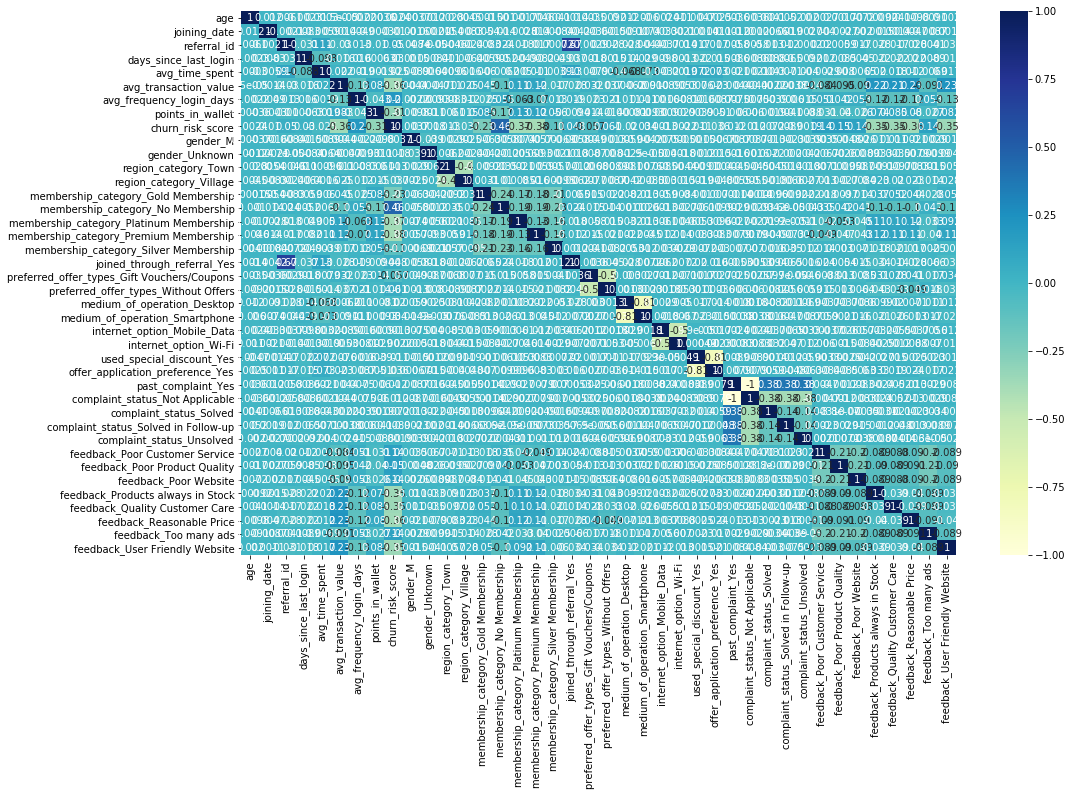

In [4415]:
plt.figure(figsize = (16, 10))
cor=data_2.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

## Linear Regression

In [4018]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_test_predict = model.predict(X_test)

In [ ]:
y_test_predict

In [ ]:
y_test_predict = pd.Series(y_test_predict.round(0).astype(int))

In [ ]:
model_f1_score = sklearn.metrics.f1_score(y_test, y_test_predict, average="macro")

In [ ]:
model_f1_score

## Random Forest

In [ ]:
import sklearn.ensemble as ske
rf_model = ske.RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))

print(rf_model.score(X_test, y_test))
# predict
# y_train_pred = rf_model.predict(X_train)
# y_test_pred = rf_model.predict(X_test)
# print(skm.accuracy_score(y_train, y_train_pred))
# print(skm.accuracy_score(y_test, y_test_pred))
# printScore(y_train, y_train_pred)
# printScore(y_test, y_test_pred)

In [ ]:
y_test_predict = rf_model.predict(X_test)

print(y_test_predict)

y_test_predict = pd.Series(y_test_predict.round(0).astype(int))

model_f1_score = sklearn.metrics.f1_score(y_test, y_test_predict, average="macro")

print(model_f1_score)

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=4,min_samples_leaf = 4, min_samples_split= 5)
gbrt.fit(X_train,y_train)
# y_pred = gbrt.predict(x_test)
# print(classification_report(y_true=y_test,y_pred=y_pred))
# print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

In [ ]:
gbrt.score(X_test,y_test)

In [ ]:
y_test_predict = gbrt.predict(X_test)

print(y_test_predict)

y_test_predict = pd.Series(y_test_predict.round(0).astype(int))

model_f1_score = sklearn.metrics.f1_score(y_test, y_test_predict, average="macro")

print(model_f1_score)

## XGB

In [4549]:
from xgboost import XGBClassifier
# xgb = XGBClassifier(max_depth=4, learning_rate=0.02, n_estimators=1000, random_state=0, subsample=0.8, colsample_bytree=0.8)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=161, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, num_class=5)

xgb.fit(X_train,y_train)

[19:27:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=161, n_jobs=1, nthread=1, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [4550]:
xgb.score(X_train,y_train)

0.8068866233804389

In [4551]:
xgb.score(X_test,y_test)

0.8030133928571429

In [4552]:
y_test_predict = xgb.predict(X_test)

print(y_test_predict)

y_test_predict = pd.Series(y_test_predict.round(0).astype(int))

model_f1_score = sklearn.metrics.f1_score(y_test, y_test_predict, average="macro")

print(model_f1_score)

[4 1 5 ... 4 4 5]
0.787033793689093


In [ ]:
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
classifier.score(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

In [ ]:
classifier.score(X_train, y_train)

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

In [ ]:
classifier.score(X_train, y_train)

In [ ]:
classifier.score(X_test,y_test)

## Evaluation

In [4553]:
# data_test[num_vars] = scaler.fit_transform(data_test[num_vars])

# y_test = data_test.pop('churn_risk_score')
X_test_final = data_test
y_test_final_predict = xgb.predict(X_test_final)

print(y_test_final_predict)

y_test_final_predict = y_test_final_predict.round(0).astype(int)

y_test_final_predict = pd.Series(y_test_final_predict)


data = {"customer_id": data_test_customer,
        "churn_risk_score": y_test_final_predict}
  
# Concatenating the series side
# by side as depicted by axis=1
# If you want to concatenate the +
# series one below the other
# change the axis to zero.
df_final = pd.concat(data,
               axis = 1)

df_final.to_csv('final.csv',index=False)

[3 3 3 ... 5 4 3]
